
Рассматриваются данные «Industrial Production: Utilities: Electric and Gas Utilities» - Индекс промышленного производства электричества и топлива.

**Исходные данные**

При взгляде на сам график видим, равномерно восходящий график в первой половине. И скачкообразное увеличение во второй половине. Так же среднее значение проходит практически по середине графика, что говорит о симметричности данных.

**Функции минимума, максимума, скользящее среднее.**

Минимальное значение показывает, что выбросы по нижней границе графика отсутствуют.
Максимальное значение показывает наличие выбросов по верхней границе графика.
Скользящее среднее позволяет увидеть возрастание графика до 2010 года с последующим выравниванием. 

**Гистограмма, квантиль.**

Квантиль 5% и 95% подтверждают информацию об отсутствии выбросов по нижней границе и наличия по верхней.
По гистограмме мы видим большой всплеск в начале графика из за медленного возрастания в начале графика (первые 10 лет).

**Корреляция параметров.**

Для данного набора данных не применимо т.к. имеется всего лишь один параметр.

**Автокорреляция, сезонность.**

При применении автокорреляции к исходным данным сезонности не выявлено. 

**Тренд.**

При построении линейной регрессии видим восходящий тренд, который практически соответствует графику.

В конце исследования я визуализировал данные по сезонам: за весь период и за интервал с 1970 с использованиям скользящего среднего.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [74]:
path = 'https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true'
data = pd.read_excel(path, skiprows=10) # Пропуск первых 10 строк
data.head()

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [75]:
data['observation_date'].head()
# Дата уже в нужном формате и хронологической последовательности => преоброзование не требуется

0   1939-01-01
1   1939-02-01
2   1939-03-01
3   1939-04-01
4   1939-05-01
Name: observation_date, dtype: datetime64[ns]

In [76]:
# Найдём минимальное, макимальное и среднее значение для колонки IPG2211A2N
 
data['IP_min'] = data['IPG2211A2N'].min()
data['IP_max'] = data['IPG2211A2N'].max()
data['IP_mean'] = data['IPG2211A2N'].mean()
data.head()

,observation_date,IPG2211A2N,IP_min,IP_max,IP_mean
0,1939-01-01,3.3842,3.3842,128.9071,54.801967
1,1939-02-01,3.4100,3.3842,128.9071,54.801967
2,1939-03-01,3.4875,3.3842,128.9071,54.801967
3,1939-04-01,3.5133,3.3842,128.9071,54.801967
4,1939-05-01,3.5133,3.3842,128.9071,54.801967


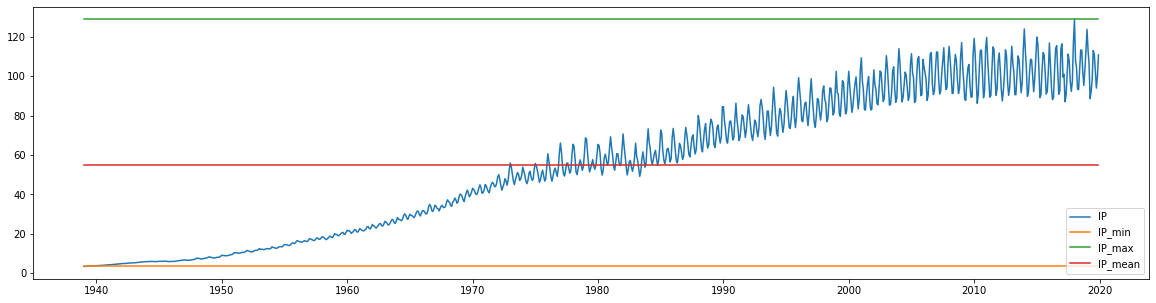

In [77]:
# Отрисуем линии минимума, максимума и среднего.
 
plt.figure(figsize=(20, 5))
x = data['observation_date']
plt.plot(x, data['IPG2211A2N'], label='IP')
plt.plot(x, data['IP_min'], label='IP_min')
plt.plot(x, data['IP_max'], label='IP_max')
plt.plot(x, data['IP_mean'], label='IP_mean')
plt.legend()

In [78]:
# Скользящее среднее
data['IPG2211A2N'].count() # 972 элемента
data['IPG2211A2N'].rolling(10).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
967    106.33884
968    106.18167
969    104.28662
970    101.89818
971    101.68592
Name: IPG2211A2N, Length: 972, dtype: float64

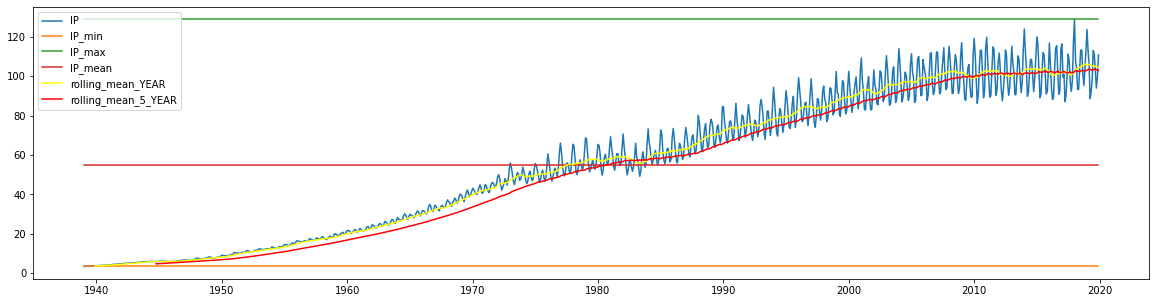

In [79]:
plt.figure(figsize=(20, 5))
x = data['observation_date']
plt.plot(x, data['IPG2211A2N'], label='IP')
plt.plot(x, data['IP_min'], label='IP_min')
plt.plot(x, data['IP_max'], label='IP_max')
plt.plot(x, data['IP_mean'], label='IP_mean')
plt.plot(x, data['IPG2211A2N'].rolling(12).mean(), label='rolling_mean_YEAR', color='yellow') # берется среднее за год
plt.plot(x, data['IPG2211A2N'].rolling(70).mean(), label='rolling_mean_5_YEAR', color='red') # берется среднее за 5 лет для наилучшего сглаживания
plt.legend()

# Данные график позволяет увидеть замедление роста Индекса промышленного производства 
# Это может свидетельствовать как об уменьшении объемов производства так и о снижении цены 

<AxesSubplot:>

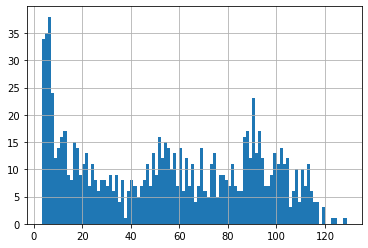

In [80]:
data['IPG2211A2N'].hist(bins=100)

In [81]:
# Найдём 95% квантиль и сравним его с максимальным значением

print(data['IPG2211A2N'].quantile(0.95))
print(data['IPG2211A2N'].max())

# Найдём 5% квантиль и сравним его с минимальным значением
# Видим, что выбросы практически отсутствуют

print(data['IPG2211A2N'].quantile(0.05))
print(data['IPG2211A2N'].min())

109.80760999999998
128.9071
5.284245
3.3842


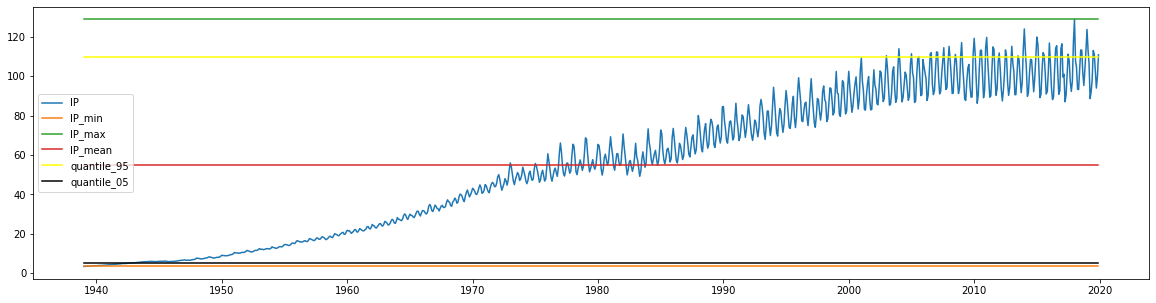

In [82]:
# Выведем квантиль на графике 

data['quantile_95'] = data['IPG2211A2N'].quantile(0.95)
data['quantile_05'] = data['IPG2211A2N'].quantile(0.05)

plt.figure(figsize=(20, 5))
x = data['observation_date']
plt.plot(x, data['IPG2211A2N'], label='IP')
plt.plot(x, data['IP_min'], label='IP_min')
plt.plot(x, data['IP_max'], label='IP_max')
plt.plot(x, data['IP_mean'], label='IP_mean')
plt.plot(x, data['quantile_95'], label='quantile_95', color='yellow')
plt.plot(x, data['quantile_05'], label='quantile_05', color='black')
plt.legend()

# По графику наглядно видно, отсутствие выбросов по нижней границы => и налицие выбросов по верхней границе.

In [83]:
data.corr()
# Не применима к данному датасету

,IPG2211A2N,IP_min,IP_max,IP_mean,quantile_95,quantile_05
IPG2211A2N,1.000000e+00,-9.630232e-16,-1.621775e-15,1.430845e-15,9.228939e-16,-1.426828e-15
IP_min,-9.630232e-16,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
IP_max,-1.621775e-15,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
IP_mean,1.430845e-15,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00
quantile_95,9.228939e-16,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00
quantile_05,-1.426828e-15,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

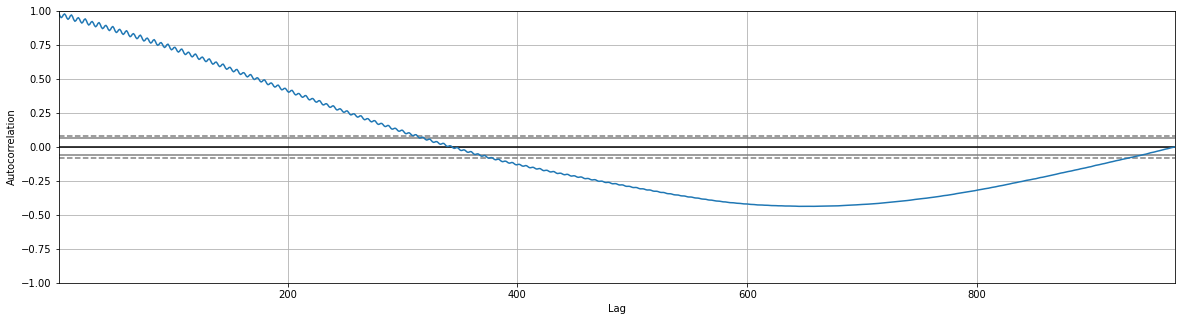

In [84]:
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data['IPG2211A2N']) 

In [85]:
model = LinearRegression() # Инициализируем модель для обучения 

X = pd.DataFrame(data.index)  
Y = data['IPG2211A2N'] 
model.fit(X, Y) 
trend = model.predict(X)

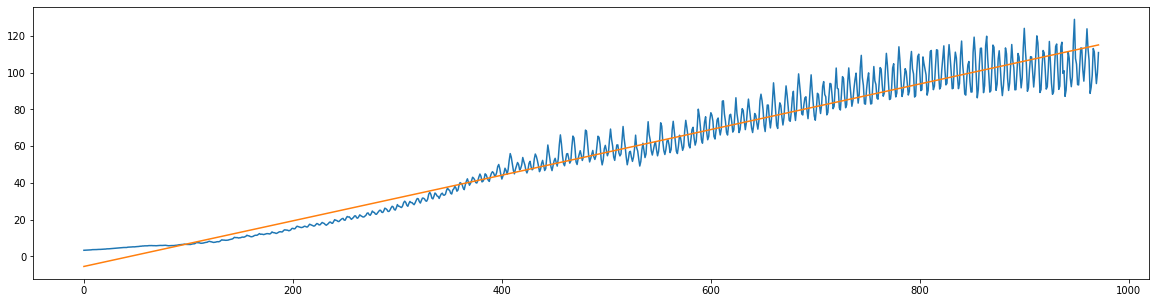

In [86]:
x = data.index
plt.figure(figsize=(20, 5))
plt.plot(x, data['IPG2211A2N'])
plt.plot(x, trend)

# Видим восходящий тренд, который практически соответствует графику

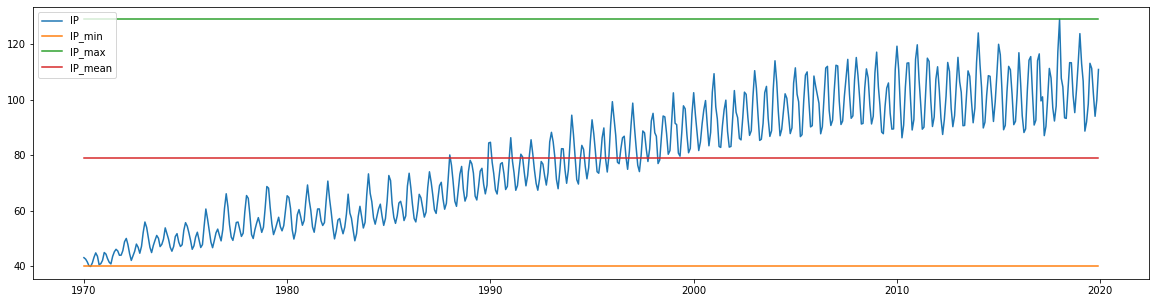

In [87]:
# График с 1970 года

data1970 = data.copy()  #решение из гугла для устранения ошибки
data1970 = data1970[data['observation_date'] >= pd.Timestamp(day=1, month=1, year=1970)]

data1970['IP_min'] = data1970['IPG2211A2N'].min()
data1970['IP_max'] = data1970['IPG2211A2N'].max()
data1970['IP_mean'] = data1970['IPG2211A2N'].mean()

plt.figure(figsize=(20, 5))
x = data1970['observation_date']
plt.plot(x, data1970['IPG2211A2N'], label='IP')
plt.plot(x, data1970['IP_min'], label='IP_min')
plt.plot(x, data1970['IP_max'], label='IP_max')
plt.plot(x, data1970['IP_mean'], label='IP_mean')
plt.legend()

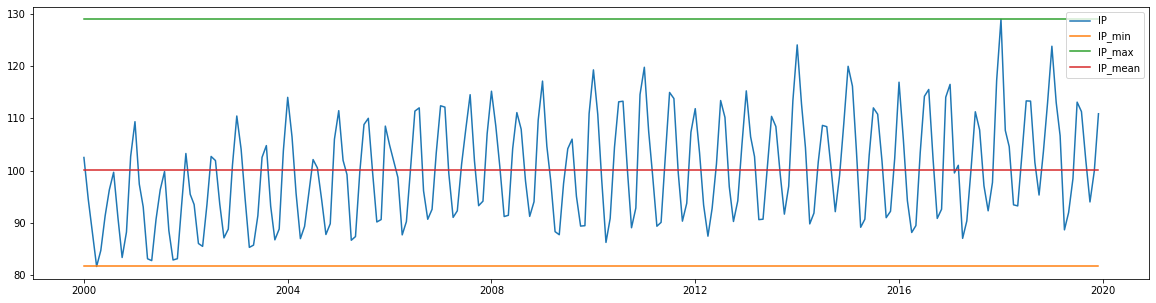

In [88]:
# График с 2000 года

data2000 = data.copy()
data2000 = data2000[data['observation_date'] >= pd.Timestamp(day=1, month=1, year=2000)]

data2000['IP_min'] = data2000['IPG2211A2N'].min()
data2000['IP_max'] = data2000['IPG2211A2N'].max()
data2000['IP_mean'] = data2000['IPG2211A2N'].mean()

plt.figure(figsize=(20, 5))
x = data2000['observation_date']
plt.plot(x, data2000['IPG2211A2N'], label='IP')
plt.plot(x, data2000['IP_min'], label='IP_min')
plt.plot(x, data2000['IP_max'], label='IP_max')
plt.plot(x, data2000['IP_mean'], label='IP_mean')
plt.legend()

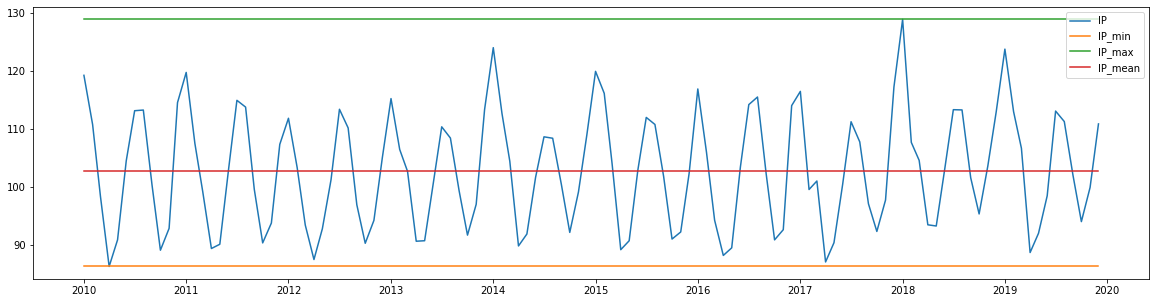

In [89]:
# График с 2010 года

data2010 = data.copy()
data2010 = data2010[data['observation_date'] >= pd.Timestamp(day=1, month=1, year=2010)]

data2010['IP_min'] = data2010['IPG2211A2N'].min()
data2010['IP_max'] = data2010['IPG2211A2N'].max()
data2010['IP_mean'] = data2010['IPG2211A2N'].mean()

plt.figure(figsize=(20, 5))
x = data2010['observation_date']
plt.plot(x, data2010['IPG2211A2N'], label='IP')
plt.plot(x, data2010['IP_min'], label='IP_min')
plt.plot(x, data2010['IP_max'], label='IP_max')
plt.plot(x, data2010['IP_mean'], label='IP_mean')
plt.legend()

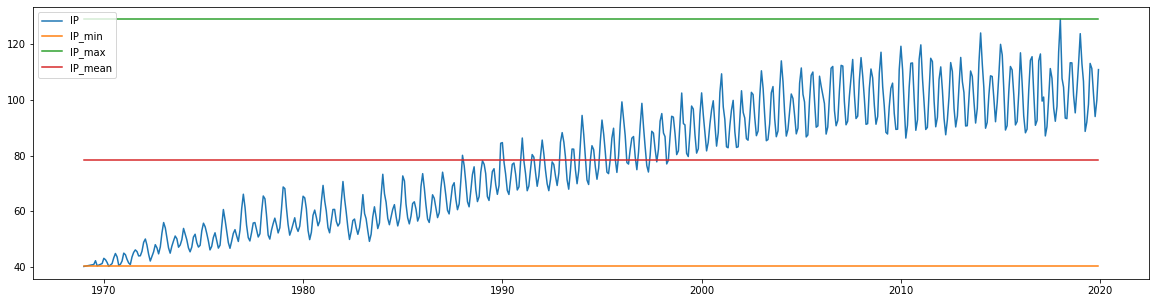

In [90]:
# В соответствии с гистограммой распределения выведем график > 40 единиц

data40 = data.copy()
data40 = data40[data['IPG2211A2N'] >= 40]

data40['IP_min'] = data40['IPG2211A2N'].min()
data40['IP_max'] = data40['IPG2211A2N'].max()
data40['IP_mean'] = data40['IPG2211A2N'].mean()

plt.figure(figsize=(20, 5))
x = data40['observation_date']
plt.plot(x, data40['IPG2211A2N'], label='IP')
plt.plot(x, data40['IP_min'], label='IP_min')
plt.plot(x, data40['IP_max'], label='IP_max')
plt.plot(x, data40['IP_mean'], label='IP_mean')
plt.legend()

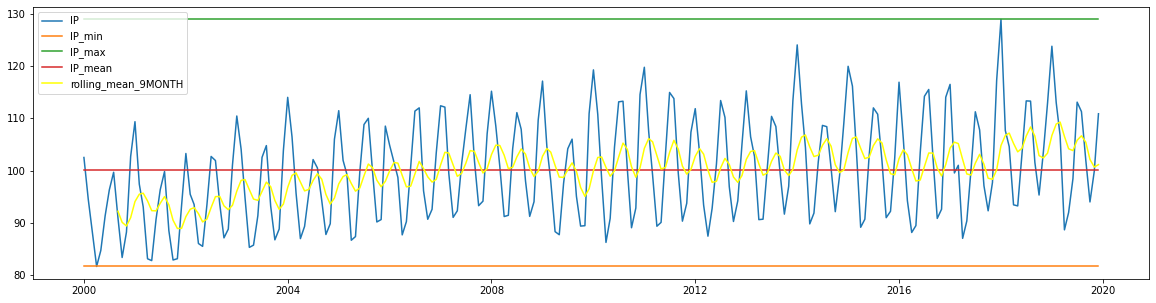

In [91]:
# Выбираем график с 2000 года

plt.figure(figsize=(20, 5))
x = data2000['observation_date']
plt.plot(x, data2000['IPG2211A2N'], label='IP')
plt.plot(x, data2000['IP_min'], label='IP_min')
plt.plot(x, data2000['IP_max'], label='IP_max')
plt.plot(x, data2000['IP_mean'], label='IP_mean')
plt.plot(x, data2000['IPG2211A2N'].rolling(9).mean(), label='rolling_mean_9MONTH', color='yellow') # берется среднее за 9 месяца
plt.legend()

# По данному графику, предположительно имеется наличие сезонности


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

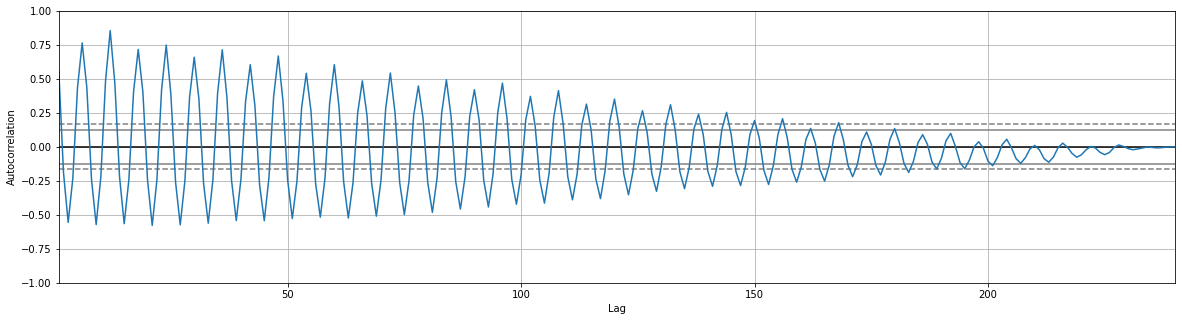

In [92]:
# Оценим сезонность по автокорреляции 

plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data2000['IPG2211A2N']) 

# Сезонность вероятно присутствует. Индекс промышленного производства для газа и электричесва должен зависеть от сезона
# Т.к. зимой их потребление растёт, попробуем это обнаружить.

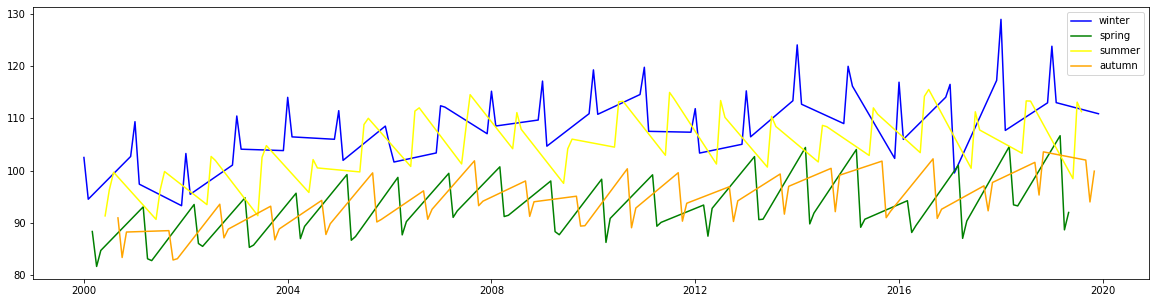

In [93]:
# Попробуем построить графики по временам года

winter = data2000[(data2000['observation_date'].dt.month == 12) | (data2000['observation_date'].dt.month == 1) | (data2000['observation_date'].dt.month == 2)]
spring = data2000[(data2000['observation_date'].dt.month == 3) | (data2000['observation_date'].dt.month == 4) | (data2000['observation_date'].dt.month == 5)]
summer = data2000[(data2000['observation_date'].dt.month == 6) | (data2000['observation_date'].dt.month == 7) | (data2000['observation_date'].dt.month == 8)]
autumn = data2000[(data2000['observation_date'].dt.month == 9) | (data2000['observation_date'].dt.month == 10) | (data2000['observation_date'].dt.month == 11)]

plt.figure(figsize=(20, 5))
x_winter = winter['observation_date']
x_spring = spring['observation_date']
x_summer = summer['observation_date']
x_autumn = autumn['observation_date']
plt.plot(x_winter, winter['IPG2211A2N'], label='winter', color='blue')
plt.plot(x_spring, spring['IPG2211A2N'], label='spring', color='green')
plt.plot(x_summer, summer['IPG2211A2N'], label='summer', color='yellow')
plt.plot(x_autumn, autumn['IPG2211A2N'], label='autumn', color='orange')
plt.legend()

# По данному графику видна тендеция сезонности, наибольший индекс. как ожидалось приходится на Зиму.

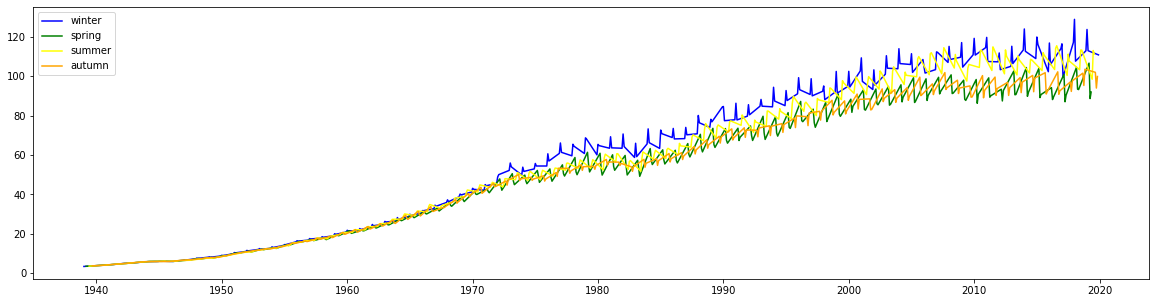

In [94]:
# Произведем такое же разделение по временам года с исходными данными

winter = data[(data['observation_date'].dt.month == 12) | (data['observation_date'].dt.month == 1) | (data['observation_date'].dt.month == 2)]
spring = data[(data['observation_date'].dt.month == 3) | (data['observation_date'].dt.month == 4) | (data['observation_date'].dt.month == 5)]
summer = data[(data['observation_date'].dt.month == 6) | (data['observation_date'].dt.month == 7) | (data['observation_date'].dt.month == 8)]
autumn = data[(data['observation_date'].dt.month == 9) | (data['observation_date'].dt.month == 10) | (data['observation_date'].dt.month == 11)]

plt.figure(figsize=(20, 5))
x_winter = winter['observation_date']
x_spring = spring['observation_date']
x_summer = summer['observation_date']
x_autumn = autumn['observation_date']
plt.plot(x_winter, winter['IPG2211A2N'], label='winter', color='blue')
plt.plot(x_spring, spring['IPG2211A2N'], label='spring', color='green')
plt.plot(x_summer, summer['IPG2211A2N'], label='summer', color='yellow')
plt.plot(x_autumn, autumn['IPG2211A2N'], label='autumn', color='orange')
plt.legend()



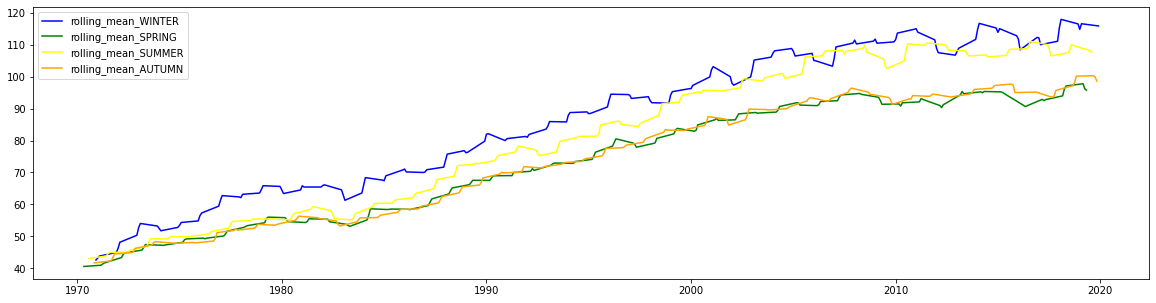

In [95]:
# И в самом конце с 1970 года с использованием скользящего среднего для наглядности

winter = data1970[(data1970['observation_date'].dt.month == 12) | (data1970['observation_date'].dt.month == 1) | (data1970['observation_date'].dt.month == 2)]
spring = data1970[(data1970['observation_date'].dt.month == 3) | (data1970['observation_date'].dt.month == 4) | (data1970['observation_date'].dt.month == 5)]
summer = data1970[(data1970['observation_date'].dt.month == 6) | (data1970['observation_date'].dt.month == 7) | (data1970['observation_date'].dt.month == 8)]
autumn = data1970[(data1970['observation_date'].dt.month == 9) | (data1970['observation_date'].dt.month == 10) | (data1970['observation_date'].dt.month == 11)]

plt.figure(figsize=(20, 5))
x_winter = winter['observation_date']
x_spring = spring['observation_date']
x_summer = summer['observation_date']
x_autumn = autumn['observation_date']
plt.plot(x_winter, winter['IPG2211A2N'].rolling(3).mean(), label='rolling_mean_WINTER', color='blue') # среднее по годам за сезон
plt.plot(x_spring, spring['IPG2211A2N'].rolling(3).mean(), label='rolling_mean_SPRING', color='green')
plt.plot(x_summer, summer['IPG2211A2N'].rolling(3).mean(), label='rolling_mean_SUMMER', color='yellow')
plt.plot(x_autumn, autumn['IPG2211A2N'].rolling(3).mean(), label='rolling_mean_AUTUMN', color='orange')
plt.legend()